## Process and Describe Project Targets

#### This notebook reads in safegraph social distancing (mobility) data and aggregates/computes targets.  Output file is a csv which is used by the notebook that produces the models.

In [1]:
import pandas as pd
import geopandas as gpd
import json
from matplotlib import pyplot as plt
import cmp

In [2]:
df = pd.read_csv('../data/cleaned_IL_sd.csv.gz', compression='gzip')

In [3]:
df.describe()

,origin_census_block_group,device_count,distance_traveled_from_home,completely_home_device_count,median_home_dwell_time,part_time_work_behavior_devices,full_time_work_behavior_devices,delivery_behavior_devices,median_non_home_dwell_time,candidate_device_count,median_percentage_time_home
count,7.255130e+05,725513.000000,7.254950e+05,725513.000000,725513.000000,725513.000000,725513.000000,725513.000000,725513.000000,725513.000000,725513.000000
mean,1.707888e+11,78.175162,7.109183e+03,29.174333,795.639152,4.741830,3.189828,1.825889,61.755624,178.383876,87.691119
std,5.958124e+08,66.786382,2.594607e+04,28.155575,323.155459,6.242844,4.920520,1.608854,100.600378,195.299819,19.272855
min,1.700100e+11,5.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,7.000000,0.000000
25%,1.703180e+11,43.000000,2.828000e+03,15.000000,627.000000,1.000000,1.000000,1.000000,4.000000,94.000000,82.000000
50%,1.704384e+11,61.000000,4.537000e+03,22.000000,818.000000,3.000000,1.000000,1.000000,23.000000,131.000000,96.000000
75%,1.711796e+11,91.000000,7.176000e+03,35.000000,1011.000000,6.000000,4.000000,2.000000,79.000000,194.000000,100.000000
max,1.720303e+11,1592.000000,4.750770e+06,765.000000,1439.000000,262.000000,234.000000,46.000000,1413.000000,6149.000000,100.000000


In [4]:
df, df_targets = cmp.process_targets(df)

In [5]:
df_targets.describe()

,geo_12,Week,device_count,fraction_of_devices_work,avg_time_away_all
count,4.838900e+04,48389.000000,48389.000000,48389.000000,48389.000000
mean,1.707888e+11,15.000083,76.429098,0.080159,3.517507
std,5.958122e+08,1.414184,65.046804,0.028944,1.182196
min,1.700100e+11,13.000000,5.500000,0.017948,0.154657
25%,1.703180e+11,14.000000,42.666667,0.060288,2.855140
50%,1.704384e+11,15.000000,60.285714,0.075705,3.381591
75%,1.711796e+11,16.000000,88.000000,0.094688,3.978202
max,1.720303e+11,17.000000,1384.285714,0.428571,19.022379


Text(0.5, 1.0, 'Fraction of Devices Exhibiting Full or Part Time Work Behavior')

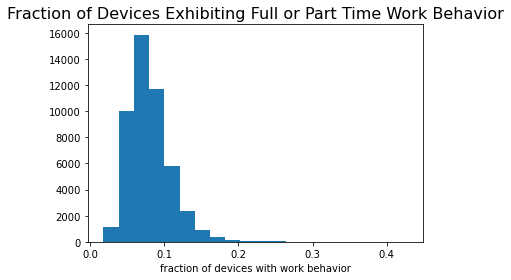

In [6]:
plt.hist(df_targets['fraction_of_devices_work'], bins=20)
plt.xlabel('fraction of devices with work behavior')
plt.title('Fraction of Devices Exhibiting Full or Part Time Work Behavior', fontsize=16)

Text(0.5, 1.0, 'Average Fraction of Time Away from Home per total devices')

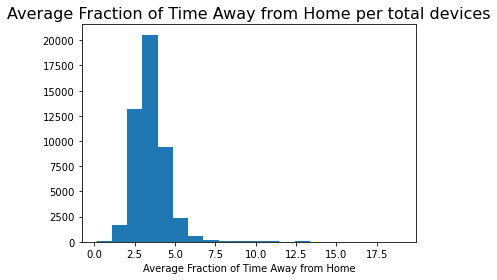

In [7]:
plt.hist(df_targets['avg_time_away_all'], bins=20)
plt.xlabel('Average Fraction of Time Away from Home')
plt.title('Average Fraction of Time Away from Home per total devices', fontsize=16)

In [8]:
df_targets.corr()

,geo_12,Week,device_count,fraction_of_devices_work,avg_time_away_all
geo_12,1.000000,-0.000020,0.167901,0.104353,0.078707
Week,-0.000020,1.000000,-0.022293,-0.002921,-0.026585
device_count,0.167901,-0.022293,1.000000,-0.252467,-0.052883
fraction_of_devices_work,0.104353,-0.002921,-0.252467,1.000000,0.209311
avg_time_away_all,0.078707,-0.026585,-0.052883,0.209311,1.000000


In [9]:
df_targets.drop(['device_count'], axis=1, inplace=True)

In [10]:
dfcolumns = pd.read_csv('../data/social_distancing_feb.csv.gz', compression='gzip',
                        nrows = 1)
df_past = pd.read_csv('../data/social_distancing_feb.csv.gz', compression='gzip',
                  header = None,
                  skiprows = 1,
                  usecols = list(range(len(dfcolumns.columns))),
                  names = dfcolumns.columns)

In [11]:
#df_targets.to_csv('COVID_mobility_targets.csv', header=True, index=False)

In [12]:
df_past, df_targets_past = cmp.process_targets(df_past, start_date='2020-02-03', end_date='2020-02-23')

In [13]:
df_targets_past.describe()

,geo_12,Week,device_count,fraction_of_devices_work,avg_time_away_all
count,1.195700e+04,11957.000000,11957.000000,11957.000000,11957.000000
mean,1.703159e+11,6.999916,67.648602,0.197360,4.426095
std,2.924846e+06,0.816514,39.077805,0.055414,0.799089
min,1.703101e+11,6.000000,6.000000,0.043867,1.356918
25%,1.703128e+11,6.000000,42.666667,0.156769,3.883954
50%,1.703180e+11,7.000000,58.714286,0.194777,4.375916
75%,1.703182e+11,8.000000,80.428571,0.234825,4.920077
max,1.703199e+11,8.000000,398.285714,0.434722,9.325020


In [14]:
#df_targets_past.to_csv('COVID_mobility_targets_past.csv', header=True, index=False)

In [15]:
#Average the weeks in the february data to get one value for each block group.
df_targets_past.drop(['Week', 'device_count'], axis=1, inplace=True)
df_targets_feb = df_targets_past.groupby('geo_12').mean().reset_index()
df_targets_feb.head()

,geo_12,fraction_of_devices_work,avg_time_away_all
0,170310101001,0.213827,4.590671
1,170310101002,0.167298,3.183210
2,170310101003,0.219090,4.473870
3,170310102011,0.200945,4.356954
4,170310102012,0.200548,3.604407


In [16]:
df_merged = df_targets.merge(df_targets_feb, on = "geo_12")

In [17]:
df_merged.columns

Index(['geo_12', 'Week', 'fraction_of_devices_work_x', 'avg_time_away_all_x',
       'fraction_of_devices_work_y', 'avg_time_away_all_y'],
      dtype='object')

In [19]:
df_merged['fraction_of_devices_work_adj'] = df_merged['fraction_of_devices_work_y'] - df_merged['fraction_of_devices_work_x']
df_merged['avg_time_away_all_adj'] = df_merged['avg_time_away_all_y'] - df_merged['avg_time_away_all_x']

In [20]:
adj_targets = df_merged[['geo_12', 'Week', 'fraction_of_devices_work_adj', 'avg_time_away_all_adj']]

In [21]:
adj_targets.describe()

,geo_12,Week,fraction_of_devices_work_adj,avg_time_away_all_adj
count,1.992200e+04,19922.000000,19922.000000,19922.000000
mean,1.703159e+11,14.999950,0.120848,1.096344
std,2.924280e+06,1.414196,0.059217,1.286821
min,1.703101e+11,13.000000,-0.197255,-12.569185
25%,1.703128e+11,14.000000,0.081214,0.466891
50%,1.703180e+11,15.000000,0.120008,1.185563
75%,1.703182e+11,16.000000,0.160404,1.849879
max,1.703199e+11,17.000000,0.331180,5.896486


In [22]:
adj_targets.corr()

,geo_12,Week,fraction_of_devices_work_adj,avg_time_away_all_adj
geo_12,1.000000,0.000067,0.095581,0.147417
Week,0.000067,1.000000,-0.000057,0.029946
fraction_of_devices_work_adj,0.095581,-0.000057,1.000000,0.438044
avg_time_away_all_adj,0.147417,0.029946,0.438044,1.000000


In [23]:
adj_targets.to_csv('COVID_mobility_targets_adjusted.csv', header=True, index=False)

Text(0.5, 1.0, 'Reduction in Fraction of Devices Exhibiting Full or Part Time Work Behavior')

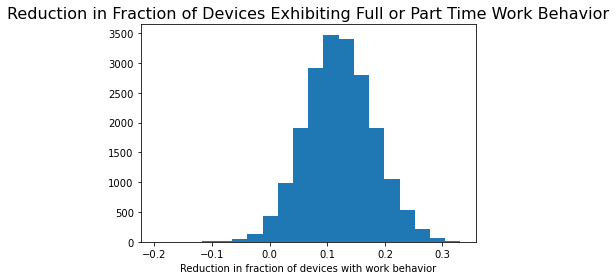

In [24]:
plt.hist(adj_targets['fraction_of_devices_work_adj'], bins=20)
plt.xlabel('Reduction in fraction of devices with work behavior')
plt.title('Reduction in Fraction of Devices Exhibiting Full or Part Time Work Behavior', fontsize=16)

Text(0.5, 1.0, 'Reduction in Average Fraction of Time Away from Home per total devices')

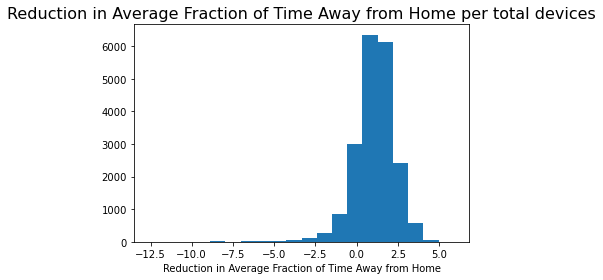

In [25]:
plt.hist(adj_targets['avg_time_away_all_adj'], bins=20)
plt.xlabel('Reduction in Average Fraction of Time Away from Home')
plt.title('Reduction in Average Fraction of Time Away from Home per total devices', fontsize=16)